## [Random Forest](https://www.ibm.com/think/topics/random-forest)

![Random Forest](https://github.com/Andru-1987/86400_data_science_i_diplomatura/blob/main/07_aprendizaje_supervisado/clase_practica/assets/random_forest.png?raw=1)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Obtencion de datos

URL:str =r"https://docs.google.com/spreadsheets/d/e/2PACX-1vTVjHDHSf0d-qpQZrqCIlynVf0KkqZ8MEloq1OF0SOsAXquEBfGXAfKFWv1917fwAbjcxZn4wv8XX7K/pub?gid=333071130&single=true&output=csv"

poblacion_india_df = pd.read_csv(URL, encoding="utf8",sep=",")

poblacion_india_df.columns=poblacion_india_df.columns.str.lower()

df = poblacion_india_df.loc[:, ["glucose", "bmi", "age", "pregnancies","outcome"]]

In [3]:
# Determinamos la variable objetivo
target = 'outcome'

# separamos nuestras variables para predecir y las etiquetas correspondientes

# variables independientes
X = df.drop(target, axis=1)

# variable dependiente
y = df[target]


In [4]:
# import las librerias que vamos usar
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error


In [5]:
# escalado de datos
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [6]:
X_scaled

array([[ 0.84832379,  0.20401277,  1.4259954 ,  0.63994726],
       [-1.12339636, -0.68442195, -0.19067191, -0.84488505],
       [ 1.94372388, -1.10325546, -0.10558415,  1.23388019],
       ...,
       [ 0.00330087, -0.73518964, -0.27575966,  0.3429808 ],
       [ 0.1597866 , -0.24020459,  1.17073215, -0.84488505],
       [-0.8730192 , -0.20212881, -0.87137393, -0.84488505]])

In [12]:
# Convertir de vuelta a DataFrame manteniendo nombres de columnas
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,glucose,bmi,age,pregnancies
0,0.848324,0.204013,1.425995,0.639947
1,-1.123396,-0.684422,-0.190672,-0.844885
2,1.943724,-1.103255,-0.105584,1.233880
3,-0.998208,-0.494043,-1.041549,-0.844885
4,0.504055,1.409746,-0.020496,-1.141852


In [7]:
# Division de los datos pero de los datos que vamos a usar para entrenamiento y para prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

---

Modelo Supervisado a usar

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
bosque = RandomForestClassifier(
    n_estimators=100,     # número de árboles
    max_depth=5,          # profundidad máxima (ajustable)
    random_state=42,      # semilla para reproducibilidad
    n_jobs=-1             # usa todos los núcleos del CPU
)

bosque.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=42)

In [16]:
predicciones_rf = bosque.predict(X_test)

In [19]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [20]:
precision_global = accuracy_score(y_test, predicciones_rf)
print(f"Precisión general: {precision_global*100:.1f}%")
print(f"Precisión (Precision): {precision_score(y_test, predicciones_rf)*100:.1f}%")
print(f"Sensibilidad (Recall): {recall_score(y_test, predicciones_rf)*100:.1f}%")
print(f"F1-Score: {f1_score(y_test, predicciones_rf)*100:.1f}%")


Precisión general: 75.3%
Precisión (Precision): 64.9%
Sensibilidad (Recall): 67.3%
F1-Score: 66.1%


*metricas*

In [21]:
from sklearn.metrics import confusion_matrix

In [23]:
print("\nMatriz de Confusión:")
matriz_rf = confusion_matrix(y_test, predicciones_rf)
print(matriz_rf)



Matriz de Confusión:
[[79 20]
 [18 37]]



Matriz de Confusión:
[[79 20]
 [18 37]]


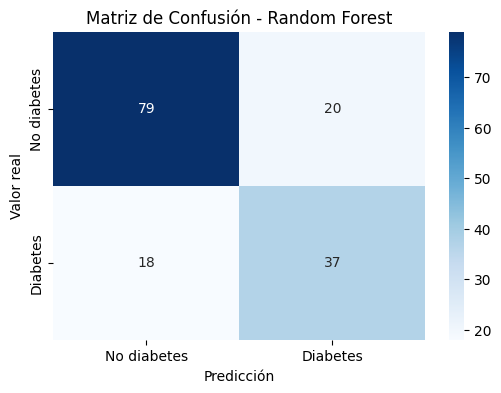

In [22]:

plt.figure(figsize=(6,4))
sns.heatmap(matriz_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No diabetes', 'Diabetes'],
            yticklabels=['No diabetes', 'Diabetes'])
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión - Random Forest")
plt.show()

In [26]:
# Valores reales y de prediccion y los comparo uno a uno

resultados_rf = pd.DataFrame({
    'Valor_Real': y_test,
    'Prediccion': predicciones_rf,
    'Correcto': y_test == predicciones_rf
})

print("\nComparación Predicciones vs Real:")
print(resultados_rf.head(10))

# Conteo de aciertos y errores
print(f"\nResumen:")
print(f"Aciertos: {resultados_rf['Correcto'].sum()}")
print(f"Errores: {len(resultados_rf) - resultados_rf['Correcto'].sum()}")


Comparación Predicciones vs Real:
     Valor_Real  Prediccion  Correcto
668           0           0      True
324           0           0      True
624           0           0      True
690           0           0      True
473           0           1     False
204           0           1     False
97            0           0      True
336           0           1     False
568           0           1     False
148           0           1     False

Resumen:
Aciertos: 116
Errores: 38


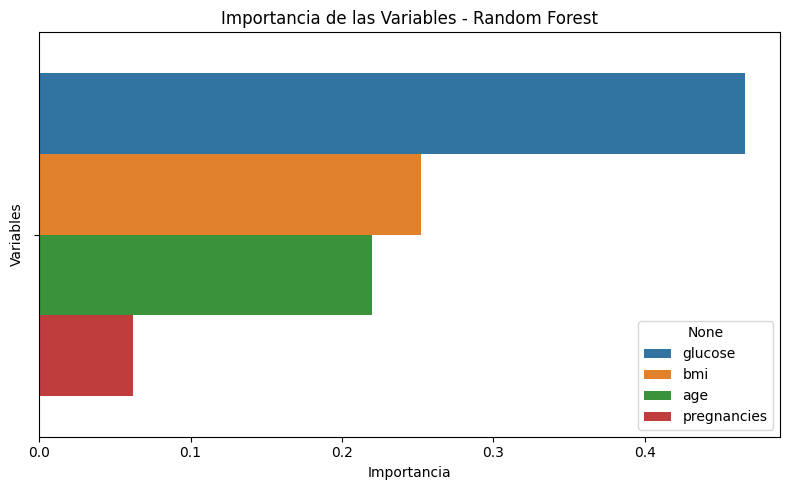

In [25]:

importancias = pd.Series(bosque.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=importancias, hue=importancias.index)
plt.title("Importancia de las Variables - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()